In [1]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
from matplotlib import image
import numpy as np
from numpy import asarray
import os
import cv2
# import scipy.optimize as opt

In [2]:
%matplotlib inline

In [3]:
def convert_RGB(image):
    im_RGB = image.convert("RGB")
    return im_RGB

In [4]:
def resize(image):
    im_resize = image.resize((80,80), Image.ANTIALIAS)
    return im_resize

In [5]:
def process_image(path):
    for item in os.listdir(path):
        if os.path.isfile(path + item):
            im = Image.open(path + item)
            if im.mode != 'RGB':
                im = convert_RGB(im)
            else:
                print("File already RGB")
            im = resize(im)
            im.save(str(path+item), 'JPEG', quality=90)
            im.close()
        else:
            print("Path not found")                

In [6]:
def print_modeANDsize(path):
    for item in os.listdir(path):
        if os.path.isfile(path+item):
            im = Image.open(path + item)
            print(im.mode, im.size, im.format, "   ", item)

In [7]:
#process_image("CALIBRATION IMAGES/Yoda/")
#process_image("CALIBRATION IMAGES/DarthVader/")

In [8]:
print_modeANDsize("CALIBRATION IMAGES/DarthVader/")
print()
print('-----------------------------------------------------------------------------------------------------------')
print()
print_modeANDsize("CALIBRATION IMAGES/Yoda/")

RGB (80, 80) JPEG     download (1).jfif
RGB (80, 80) JPEG     download (10).jfif
RGB (80, 80) JPEG     download (11).jfif
RGB (80, 80) JPEG     download (12).jfif
RGB (80, 80) JPEG     download (13).jfif
RGB (80, 80) JPEG     download (14).jfif
RGB (80, 80) JPEG     download (15).jfif
RGB (80, 80) JPEG     download (16).jfif
RGB (80, 80) JPEG     download (17).jfif
RGB (80, 80) JPEG     download (18).jfif
RGB (80, 80) JPEG     download (19).jfif
RGB (80, 80) JPEG     download (2).jfif
RGB (80, 80) JPEG     download (20).jfif
RGB (80, 80) JPEG     download (22).jfif
RGB (80, 80) JPEG     download (23).jfif
RGB (80, 80) JPEG     download (24).jfif
RGB (80, 80) JPEG     download (25).jfif
RGB (80, 80) JPEG     download (26).jfif
RGB (80, 80) JPEG     download (27).jfif
RGB (80, 80) JPEG     download (28).jfif
RGB (80, 80) JPEG     download (29).jfif
RGB (80, 80) JPEG     download (3).jfif
RGB (80, 80) JPEG     download (30).jfif
RGB (80, 80) JPEG     download (4).jfif
RGB (80, 80) JPEG   

RGB (80, 80) JPEG     download (10).jfif
RGB (80, 80) JPEG     download (11).jfif
RGB (80, 80) JPEG     download (12).jfif
RGB (80, 80) JPEG     download (13).jfif
RGB (80, 80) JPEG     download (14).jfif
RGB (80, 80) JPEG     download (15).jfif
RGB (80, 80) JPEG     download (16).jfif
RGB (80, 80) JPEG     download (17).jfif
RGB (80, 80) JPEG     download (18).jfif
RGB (80, 80) JPEG     download (19).jfif
RGB (80, 80) JPEG     download (2).jfif
RGB (80, 80) JPEG     download (20).jfif
RGB (80, 80) JPEG     download (21).jfif
RGB (80, 80) JPEG     download (22).jfif
RGB (80, 80) JPEG     download (23).jfif
RGB (80, 80) JPEG     download (24).jfif
RGB (80, 80) JPEG     download (25).jfif
RGB (80, 80) JPEG     download (26).jfif
RGB (80, 80) JPEG     download (27).jfif
RGB (80, 80) JPEG     download (28).jfif
RGB (80, 80) JPEG     download (29).jfif
RGB (80, 80) JPEG     download (3).jfif
RGB (80, 80) JPEG     download (30).jfif
RGB (80, 80) JPEG     download (31).jfif
RGB (80, 80) JPEG 

In [9]:
## Showing Data

In [10]:
img = cv2.imread("CALIBRATION IMAGES/Yoda/images - 2020-02-17T194233.532.jfif")

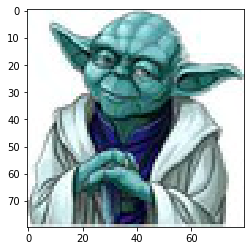

In [11]:
plt.imshow(img)
plt.show()

In [12]:
img.shape

(80, 80, 3)

In [13]:
## Creating Data

In [105]:
def create_x(path):
    data = []
    for item in os.listdir(path):
        if os.path.isfile(path + item):
            img = cv2.imread(path + item)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = np.array(np.ravel(img, order='F'))
            data.append(img)
    return np.array(data)

In [163]:
def create_y(data, label):
#    y = np.empty((len(data)), dtype='object')
#    for i in range(len(y)):
#        y[i] = label
    y = np.array([label] * len(data), dtype="int8")
    return np.array(y)

In [127]:
darth_x = create_x("CALIBRATION IMAGES/DarthVader/")
yoda_x = create_x("CALIBRATION IMAGES/Yoda/")

In [164]:
darth_y = create_y(darth_x, [1,0])
yoda_y = create_y(yoda_x, [0,1])

In [166]:
print(darth_x.shape)
print(darth_y.shape)
print(yoda_x.shape)
print(yoda_y.shape)

(266, 19200)
(266, 2)
(265, 19200)
(265, 2)


In [142]:
X = np.vstack((darth_x, yoda_x))
y = np.vstack((darth_y, yoda_y))

In [143]:
data = np.hstack((X,y))

In [167]:
data.shape

(531, 19202)

In [170]:
## Data Visualization

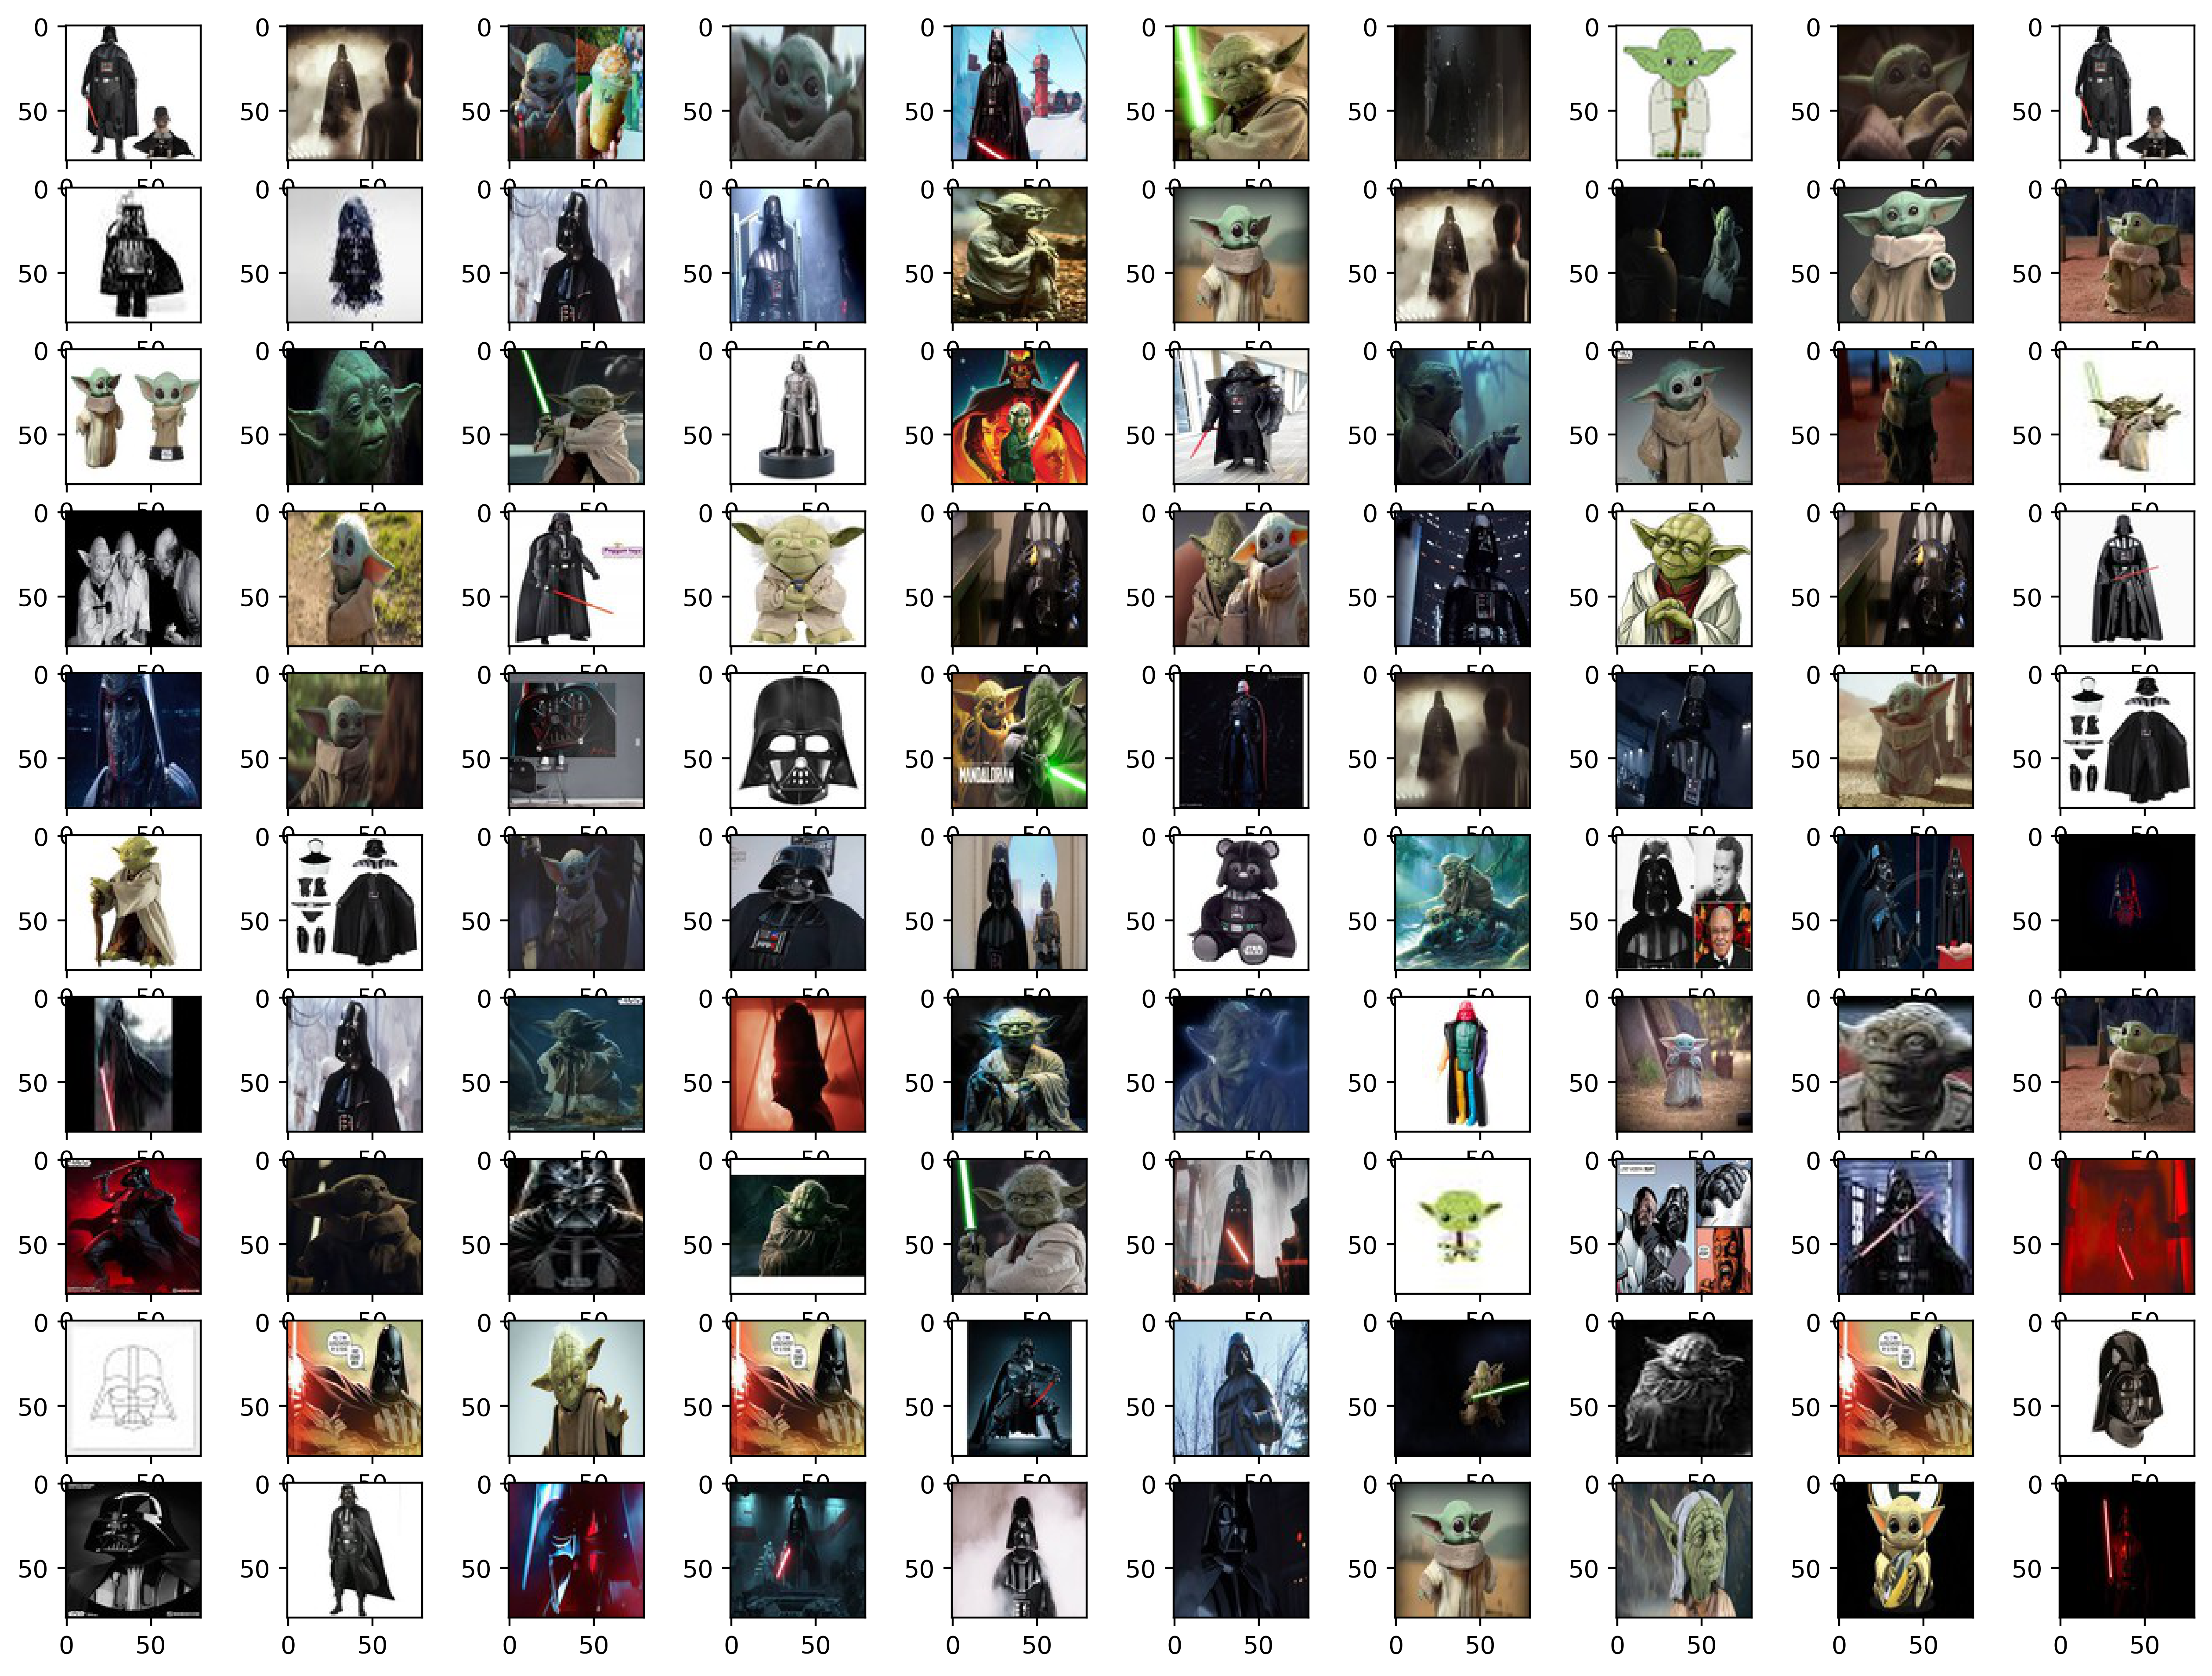

In [172]:
fig, ax = plt.subplots(10,10, figsize=(16, 12), dpi= 400, facecolor='w', edgecolor='k')
for row in range(10):
    for col in range(10):
        ax[row][col].imshow(X[np.random.randint(0, len(X)-1)].reshape((80,80,3), order='F'))

In [173]:
## Split Data

In [181]:
def train_test_split(X, test_ratio):
    m = len(X)
    split = int((m * test_ratio))

    X_train = X[:m-(split)]
    X_test = X[m-split:]
    y_train = y[:m-split]
    y_test = y[m-split:]
    
    print("X train shape: ", X_train.shape)
    print("y train shape: ", y_train.shape)
    print("X test shape: ", X_test.shape)
    print("y test shape: ", y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [182]:
np.random.shuffle(data)

In [183]:
X = data[:, :-2]
y = data[:,-2:]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, .10)

X train shape:  (478, 19200)
y train shape:  (478, 2)
X test shape:  (53, 19200)
y test shape:  (53, 2)


In [81]:
## Hyperparameters

In [186]:
m = len(X_train)
input_size = X_train.shape[1]
layer1_size = 64
layer2_size = 64
num_labels = y_train.shape[1]
lmda = 1

In [190]:
# The +1 is for the bias
theta1 = np.zeros((layer1_size, input_size+1))
theta2 = np.zeros((layer2_size, layer1_size+1))
theta3 = np.zeros((num_labels, layer2_size+1))

In [191]:
combined_params = np.hstack((theta1.ravel(order='F'), theta2.ravel(order='F'), theta3.ravel(order='F')))

In [192]:
print(theta1.ravel(order='F').shape)
print(theta2.ravel(order='F').shape)
print(theta3.ravel(order='F').shape)
print(combined_params.shape)

(1228864,)
(4160,)
(130,)
(1233154,)


In [94]:
## Feed-forward Cost Function

In [ ]:
# What is sigmoid used for? Activation function?
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def CostFunc(combined_params, input_size, layer1_size, layer2_size, num_labels, X, y, lmda):
    mark1 = (input_size+1)*layer1_size
    mark2 = mark1 + (layer1_size+1) * layer2_size
    
    theta1 = np.reshape(combined_params[:mark1], (layer1_size, input_size+1), order='F')
    theta2 = np.reshape(combined_params[mark1:mark2], (layer2_size, layer1_size+1), order='F')
    theta3 = np.reshape(combined_params[mark2:], (num_labels, layer2_size+1), order='F')
    
    m = len(y)
    
    a1 = np.hstack((np.ones(shape=(m,1)),X))
    y = dummy(y, num_labels)
    
    z2 = np.dot(a1, theta1.T)
    a2 = sigmoid(z2)
    a2 = np.hstack((np.ones(shape=(len(a2),1)),a2))
    
    z3 = np.dot(a2, theta2.T)
    a3 = sigmoid(z3)
    a3 = np.hstack((np.ones(shape=(len(a3),1)),a3))
    
    z4 = np.dot(a3, theta3.T)
    a4 = sigmoid(z4)
    
    temp1 = -y * np.log(a4)
    temp2 = (1-y) * np.log(1-a4)
    temp3 = temp1-temp2
    
    theta1_regularized = np.sum(np.sum(np.square(theta1[:,1:]), axis = 1))
    theta2_regularized = np.sum(np.sum(np.square(theta2[:,1:]), axis = 1))
    theta3_regularized = np.sum(np.sum(np.square(theta3[:,1:]), axis = 1))
    
    j_cost_unregularized = np.sum(np.sum(temp3)) * (1 / m)
    
    j_cost = j_cost_unregularized + (lmda / (2*m)) * (theta1_regularized + theta2_regularized + theta3_regularized)
    
    
    return j_cost  
    

In [95]:
## Gradient Backpropogation

In [ ]:
def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [ ]:
def randInitializeWeights(L_in, L_out):
    epsilon = 0.12
    return np.random.rand(L_out, L_in+1) * 2 * epsilon - epsilon

In [ ]:
def Gradient(nn_params, input_size, layer1_size, layer2_size, num_labels, X, y, lmda):    
    mark1 = (input_size+1)*layer1_size
    mark2 = mark1 + (layer1_size+1) * layer2_size
    
    initial_theta1 = np.reshape(nn_params[:mark1], (layer1_size, input_size+1), order='F')
    initial_theta2 = np.reshape(nn_params[mark1:mark2], (layer2_size, layer1_size+1), order='F')
    initial_theta3 = np.reshape(nn_params[mark2:], (num_labels, layer2_size+1), order='F')
    
    m = len(y)
    y_dum = dummy(y, num_labels)
    
    delta1 = np.zeros(shape=(initial_theta1.shape))
    delta2 = np.zeros(shape=(initial_theta2.shape))
    delta3 = np.zeros(shape=(initial_theta3.shape))
    
    for i in range(m):
        ones = np.ones(1)
        a1 = np.hstack((np.ones(1), X[i]))
        
        z2 = np.dot(a1, initial_theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack((np.ones(1), a2))
        
        z3 = np.dot(a2, initial_theta2.T)
        a3 = sigmoid(z3)
        a3 = np.hstack((np.ones(1), a3))
        
        z4 = np.dot(a3, initial_theta3.T)
        a4 = sigmoid(z4)
        
        d4 = a4 - y_dum[i,:][np.newaxis,:]
        z3 = np.hstack((ones, z3))
        d3 = np.dot(initial_theta3.T, d4.T) * sigmoid_gradient(z3).T[:, np.newaxis]
        # 26 x 2 * 2 x 1
        z2 = np.hstack((ones, z2))
        d2 = np.dot(initial_theta2.T, d3[1:,:]) * sigmoid_gradient(z2).T[:,np.newaxis]
        # 101 x 25 * 26 x 1
        
        delta1 = delta1 + np.dot(d2[1:,:], a1[np.newaxis,:])
        delta2 = delta2 + np.dot(d3[1:,:], a2[np.newaxis,:])
        delta3 = delta3 + np.dot(d4.T, a3[np.newaxis,:])
        
        
    
    delta1 = delta1 / m
    delta2 = delta2 / m
    delta3 = delta3 / m
    
    delta1[:,1:] = delta1[:,1:] + initial_theta1[:,1:] * lmda / m
    delta2[:,1:] = delta2[:,1:] + initial_theta2[:,1:] * lmda / m
    delta3[:,1:] = delta3[:,1:] + initial_theta3[:,1:] * lmda / m
    
    return np.hstack((delta1.ravel(order = 'F'), delta2.ravel(order='F'), delta3.ravel(order='F')))

In [ ]:
def checkGradient(nn_initial_params,nn_backprop_Params,input_layer_size, hidden_layer1_size, hidden_layer2_size, num_labels,myX,myy,mylambda=0.):
    myeps = 0.0001
    flattened = nn_initial_params
    flattenedDs = nn_backprop_Params
    n_elems = len(flattened) 
    #Pick ten random elements, compute numerical gradient, compare to respective D's
    for i in range(10):
        x = int(np.random.rand()*n_elems)
        epsvec = np.zeros((n_elems,1))
        epsvec[x] = myeps

        cost_high = CostFunc(flattened + epsvec.flatten(),input_layer_size, hidden_layer1_size, hidden_layer2_size, num_labels,myX,myy,mylambda)
        cost_low  = CostFunc(flattened - epsvec.flatten(),input_layer_size, hidden_layer1_size, hidden_layer2_size, num_labels,myX,myy,mylambda)
        mygrad = (cost_high - cost_low) / float(2*myeps)
        print("Element: {0}. Numerical Gradient = {1:.9f}. BackProp Gradient = {2:.9f}.".format(x,mygrad,flattenedDs[x]))


In [ ]:
# Initialize Weights
initial_theta1 = randInitializeWeights(input_size, layer1_size)
initial_theta2 = randInitializeWeights(layer1_size, layer2_size)
initial_theta3 = randInitializeWeights(layer2_size, num_labels)

# unrolling parameters into a single column vector
initial_params = np.hstack((initial_theta1.ravel(order='F'), initial_theta2.ravel(order='F'), \
                               initial_theta3.ravel(order='F')))

In [ ]:
## Optimizer

In [ ]:
theta_opt = opt.fmin_cg(maxiter = 50, f = CostFunc, x0 = nn_initial_params, fprime = Gradient, \
                        args = (input_layer_size, hidden_layer1_size, hidden_layer2_size, num_labels, X_train, y_train.flatten(), lmda))

mark1 = (input_layer_size+1)*hidden_layer1_size
mark2 = mark1 + (hidden_layer1_size+1) * hidden_layer2_size

theta1_opt = np.reshape(theta_opt[:mark1], (hidden_layer1_size, input_layer_size+1), order='F')
theta2_opt = np.reshape(theta_opt[mark1:mark2], (hidden_layer2_size, hidden_layer1_size+1), order='F')
theta3_opt = np.reshape(theta_opt[mark2:], (num_labels, hidden_layer2_size+1), order='F')


In [96]:
## Predictions & Evaluation

In [ ]:
# NEEDS WORK
def predict(theta1, theta2, theta3, X, y):
    m = len(y)
    guesses = [None]*m
    
    ones = np.ones((m,1))
    a1 = np.hstack((ones, X))
    a2 = sigmoid(a1 @ theta1.T)
    a2 = np.hstack((ones, a2))
    a3 = sigmoid(a2 @ theta2.T)
    a3 = np.hstack((ones, a3))
    h = sigmoid(a3 @ theta3.T)
    
    prediction = np.argmax(h, axis = 1) + 1
    confidence = np.max(h, axis=1)*100
    
    for i in range(m):
        if prediction[i] == 2:
            guesses[i] = "Iron Man"
        elif prediction[i] == 1:
            guesses[i] = "Hulk"
            
    return prediction, confidence, guesses

In [ ]:
def confusion_matrix(predictions, y_test, label):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for i in range(len(y_test)):
        if predictions[i] == label and predictions[i] == y_test[i]:
            true_positives += 1
        elif predictions[i] != label and predictions[i] == y_test[i]:
            true_negatives += 1
        elif predictions[i] == label and predictions[i] != y_test[i]:
            false_positives += 1
        elif predictions[i] != label and predictions[i] != y_test[i]:
            false_negatives += 1
    return true_positives, true_negatives, false_positives, false_negatives

In [ ]:
def model_accuracy(prediction, y_test):
    accuracy = np.mean(prediction==y_test.flatten()) * 100
    return accuracy

In [ ]:
def precision_recall(tp, fp, fn):
    precision = tp / (tp + fp) * 100
    recall = tp / (tp + fn) * 100

    return precision, recall

In [ ]:
def print_confusion():
    ironman_confusionmatrix = {
    "Iron Man True Positives":ironman_tp,
    "Iron Man True Negatives":ironman_tn,
    "Iron Man False Positives":ironman_fp,
    "Iron Man False Negatives":ironman_fn
}

    hulk_confusionmatrix = {
        "Hulk True Positives":hulk_tp,
        "Hulk True Negatives":hulk_tn,
        "Hulk False Positives":hulk_fp,
        "Hulk False Negatives":hulk_fn
    }

    for key,value in ironman_confusionmatrix.items():
        print(key,':',value)

    print("\n")

    for key,value in hulk_confusionmatrix.items():
        print(key,':',value)

In [ ]:
# Predictions & confidence
predictions, confidences, guesses = predict(theta1_opt, theta2_opt, theta3_opt, X_test, y_test)

In [ ]:
# Confusion matrix values for each label
ironman_tp, ironman_tn, ironman_fp, ironman_fn = confusion_matrix(predictions, y_test, label=1)
hulk_tp, hulk_tn, hulk_fp, hulk_fn = confusion_matrix(predictions, y_test, label=2)

In [ ]:
# Precision & Recall for each label
ironman_precision, ironman_recall = precision_recall(ironman_tp, ironman_fp, ironman_fn)
hulk_precision, hulk_recall = precision_recall(hulk_tp, hulk_fp, hulk_fn)

In [ ]:
print_confusion()

In [ ]:
print("Iron Man Precision: %d %% \nIron Man Recall: %d %%" %(ironman_precision, ironman_recall))
print("\n")
print("Hulk Precision: %d %% \nHulk Recall: %d %%" %(hulk_precision, hulk_recall))
print("\n")
print(f"Overall accuracy: {np.round(model_accuracy(predictions,y_test), 0)}%")